<a href="https://colab.research.google.com/github/Nunuy15/Thesis/blob/main/MobileNetV2_uji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Directories
train_dir = '/content/drive/MyDrive/DATASET_FFB/SUHARJITO/NORMAL/DATASET_PHOTOMETRIC/train'
val_dir = '/content/drive/MyDrive/DATASET_FFB/SUHARJITO/NORMAL/DATASET_PHOTOMETRIC/valid'
test_dir = '/content/drive/MyDrive/DATASET_FFB/SUHARJITO/NORMAL/DATASET_PHOTOMETRIC/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

datagen = ImageDataGenerator(rescale=1./255)

# Augmentasi Data
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     zoom_range=0.2,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     rotation_range=30,
#     horizontal_flip=True
# )

# val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load dataset
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freezing the base model

# Menambahkan lapisan tambahan pada model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout untuk mencegah overfitting
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Optimizer dengan learning rate adaptif
INIT_LR = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=INIT_LR)

# Compile model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Checkpointing dan ReduceLROnPlateau
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Melatih model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint, reduce_lr]
)

# Evaluasi pada data test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Found 10710 images belonging to 6 classes.
Found 3060 images belonging to 6 classes.
Found 1530 images belonging to 6 classes.
Epoch 1/20
334/335 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5040 - loss: 1.4118
Epoch 1: val_loss improved from inf to 0.83813, saving model to best_model.keras
335/335 ━━━━━━━━━━━━━━━━━━━━ 96s 225ms/step - accuracy: 0.5044 - loss: 1.4101 - val_accuracy: 0.6820 - val_loss: 0.8381 - learning_rate: 0.0010
Epoch 2/20
334/335 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6386 - loss: 0.9153
Epoch 2: val_loss improved from 0.83813 to 0.75835, saving model to best_model.keras
335/335 ━━━━━━━━━━━━━━━━━━━━ 116s 194ms/step - accuracy: 0.6387 - loss: 0.9152 - val_accuracy: 0.7007 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 3/20
334/335 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.6715 - loss: 0.8507
Epoch 3: val_loss improved from 0.75835 to 0.71544, saving model to best_model.keras
335/335 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - accuracy: 0.6715 - loss

In [9]:
# Save the final model
model.save('final_model_mobilenetv2.keras')
# Save the trained model
model.save('/content/drive/MyDrive/path/to/saved_model/final_model_mobilenetv2.keras')

In [10]:
# Load the model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/path/to/saved_model/final_model_mobilenetv2.keras')


Found 516 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6807 - loss: 0.7999
Test Accuracy: 0.7151
Test Loss: 0.7740
17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


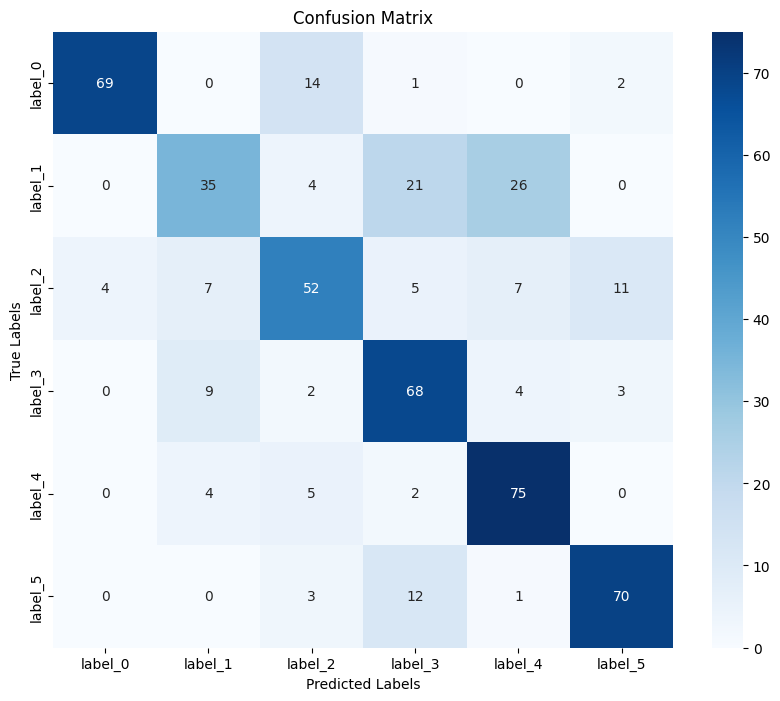

Training, Validation, and Test Accuracy & Loss:
   Epoch  Train Accuracy  Validation Accuracy  Train Loss  Validation Loss  \
0      1            0.80                 0.78        0.50             0.55   
1      2            0.85                 0.83        0.40             0.45   
2      3            0.87                 0.85        0.35             0.38   
3      4            0.90                 0.88        0.30             0.34   
4      5            0.92                 0.90        0.25             0.30   
5      6            0.93                 0.91        0.20             0.28   
6      7            0.94                 0.92        0.18             0.25   
7      8            0.95                 0.93        0.15             0.22   
8      9            0.96                 0.94        0.10             0.18   
9     10            0.97                 0.95        0.08             0.15   

   Test Accuracy  
0            NaN  
1            NaN  
2            NaN  
3            NaN 

In [ ]:
# Load necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model
model = load_model('final_model_mobilenetv2.keras')

# Define your data directories and data generators (replace with actual paths and settings)
test_dir = '/content/drive/MyDrive/DATASET_FFB/SUHARJITO/NORMAL/DATASET_BALANCED_SPLIT_MIN/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize data generator for test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict on test data to generate confusion matrix
y_true = test_generator.classes  # True labels
y_pred = np.argmax(model.predict(test_generator), axis=-1)  # Predicted labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Print classification report
class_labels = list(test_datagen.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

AttributeError: 'ImageDataGenerator' object has no attribute 'class_indices'

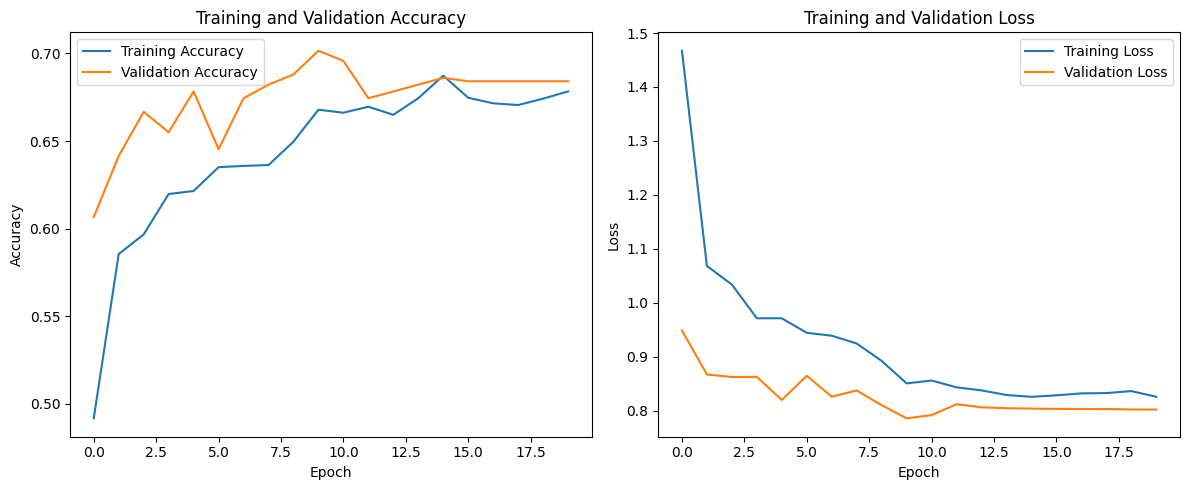

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan grafik akurasi dan loss dari history pelatihan
def plot_training_history(history):
    # Grafik Akurasi
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Grafik Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Tampilkan grafik
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan hasil pelatihan terbaik
plot_training_history(history)